# Splines

## Introducción a los Splines

Los *splines* son funciones que nos ayudan a representar una curva suave a través de una serie de puntos conocidos (llamados puntos de control). En gráficos por computadora, diseño asistido por computador (CAD), y otros campos como la **interpolación de datos**, se utilizan para crear representaciones suaves de curvas y superficies.

El objetivo de los splines es lograr una interpolación (o aproximación) precisa y continua entre los puntos de control. Esto se hace de forma que la transición entre los puntos sea lo más suave posible, reduciendo cambios bruscos que pueden ser poco naturales o no deseados.

Entonces, un spline es una función de grado $k$, que satisface $t_0, t_1, ..., t_n$. A los $t_i$ se les llama nodos.

1. En cada intervalo $[t_{i-1}, t_i)$, $S$ es un polinomio de grado $k$.
2. $S$ tiene $k-1$ primeras derivadas en $[t_0, t_n]$.

### Tipos de Splines

Existen varios tipos de splines, y cada uno tiene su propio grado de continuidad y suavidad entre los puntos. Aquí vamos a centrarnos en tres grados básicos:

1. **Spline de grado cero:** Es el spline más sencillo y conecta los puntos sin suavidad; es decir, simplemente une cada punto con líneas planas o constantes.
2. **Spline de primer grado (Spline lineal):** Conecta los puntos con segmentos de línea recta. Aunque es más suave que el spline de grado cero, su continuidad es solo en valor, sin suavidad en la pendiente (no es diferenciado).
3. **Spline de segundo grado (Spline cuadrático):** Conecta los puntos con curvas suaves que son continuas en valor y en pendiente, logrando un ajuste más preciso y visualmente más agradable.

## Spline de grado cero (Escalonado)

### Definición

Un spline de grado cero es una función constante por partes. Cada intervalo entre dos puntos de control tiene un valor constante, lo que significa que no hay transición suave entre los valores de cada intervalo. Este tipo de spline no es continuo y cambia bruscamente de un valor a otro.

$$
S(x)= \left\{\begin{matrix}
 S_0(x) = C_0 ; x \in [t_0, t_1) \\
 S_1(x) = C_1 ; x \in [t_1, t_2)\\
 ...\\
 S_n(x) = C_n ; x \in [t_{n-1}, t_n]
\end{matrix}\right.
$$

### Ejemplo práctico

Supongamos que tenemos los siguientes puntos de control:

$$
(x_0, y_0)=(1,3); (x_1, y_1)=(2, 5); (x_2, y_2)=(4, 4)
$$

Para construir el spline de grado cero, simplemente asignamos el valor de $y$ de cada punto a su intervalo:

1. Para $x$ en $[1, 2)$: $y=3$.
2. Para $x$ en $[2, 4)$: $y=5$.
3. Para $x \geq 4$: $y=4$.

Entonces, la función del spline escalonado será:

$$
S(x)= \left\{\begin{matrix}
 3 si 1 \leq x \lt 2\\
 5 si 2 \leq x \lt 4\\
 4 si x \gt 4
\end{matrix}\right.
$$

Veamos como se representa la función $S(x)$ gráficamente:

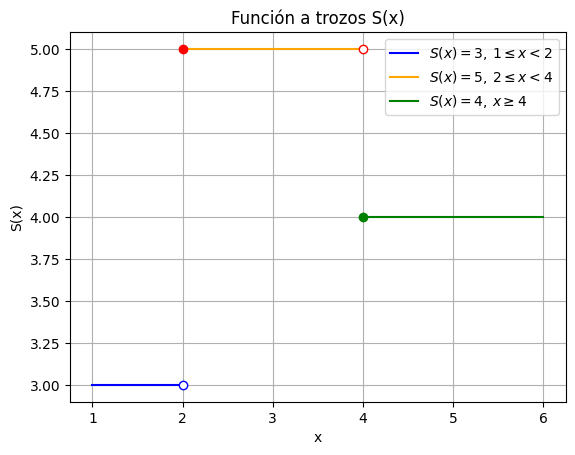

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(1, 2, 100, endpoint=False)
x2 = np.linspace(2, 4, 100, endpoint=False)
x3 = np.linspace(4, 6, 100)

y1 = np.full_like(x1, 3)
y2 = np.full_like(x2, 5)
y3 = np.full_like(x3, 4)

plt.plot(x1, y1, label=r'$S(x) = 3, \, 1 \leq x < 2$', color='blue')
plt.plot(x2, y2, label=r'$S(x) = 5, \, 2 \leq x < 4$', color='orange')
plt.plot(x3, y3, label=r'$S(x) = 4, \, x \geq 4$', color='green')

plt.plot(2, 3, 'bo', markerfacecolor='white')
plt.plot(2, 5, 'ro')
plt.plot(4, 5, 'ro', markerfacecolor='white')
plt.plot(4, 4, 'go')

plt.xlabel('x')
plt.ylabel('S(x)')
plt.title('Función a trozos S(x)')
plt.legend()
plt.grid(True)

plt.show()

## Spline de primer grado (Spline Lineal)

### Definición

Un spline de primer grado conecta los puntos de control con segmentos de líneas rectas. Esto significa que entre cada par de puntos de control, la función cambia de forma lineal, logrando una continuidad en el valor pero no en la pendiente (no hay suavidad en las uniones).

Tenemos entonces que el polinomio $S$ en este caso se define como:

$$
S(x) = \left\{\begin{matrix}
 S_0(x) = a_0 + b_0x ; x \in [t_0, t_1) \\
 S_1(x) = a_1 + b_1x ; x \in [t_1, t_2)\\
 ...\\
 S_n(x) = a_n + b_nx ; x \in [t_{n-1}, t_n]
\end{matrix}\right.
$$

Las condiciones del spline de grado uno son:

1. $S(x)$ está definido en el intervalo $[t_0, t_n]$.
2. $S(x)$ es continua en $[t_0, t_n]$.
3. Los nodos $t_i$ cumplen que $t_0 \leq t_1 \leq ... \leq t_n$.
4. $S_i(x)$ es un polinomio lineal en $[t_{n-1}, t_i]$.

## Paso a paso

1. Establecer los intervalos usando los nodos $[t_{i-1}, t_i]$.
2. Construir $S(x)$ de forma general (usando los $a_i$, $b_i$).
3. Especificar las ecuaciones correspondientes según la tabla de valores (tabla que relaciona los valores de $x$ con sus valores correspondientes de $y$).
4. Definir las condiciones de interpolación.
5. Definir las condiciones de continuidad.

En este spline de grado uno, se tendrán tantas ecuaciones como intervalos. También sabemos que tendremos solución, ya que tenemos $n$ incógnitas y $n$ ecuaciones.

## Spline de grado dos (k = 2)

### Propiedades

1. $S(x)$ está definido en el intervalo $[t_0, t_n]$.
2. $S(x)$ es un polinomio de grado $k=2$ en cada intervalo $[t_{i-1}, t_i]$.
3. $S(x)$ es continua en $[t_0, t_i$].
4. $S'(x)$ es continua en $[t_0, t_i]$.

Tenemos que:

$$
S(x) = \left\{\begin{matrix}
 S_0(x) = a_0x^2 + b_0x + c_0 ; x \in [t_0, t_1) \\
 S_1(x) = a_1x^2 + b_1x + c_1 ; c_1 \in [t_1, t_2)\\
 ...\\
 S_{n-1}(x) = a_{n-1}x^2 + b_{n-1}x + c_{n-1} ; x \in [t_{n-1}, t_n]
\end{matrix}\right.
$$

Para el spline de grado 2, teniendo en cuenta la tabla dada, tendremos cuatro ecuaciones de interpolación, dos ecuaciones de continuidad, dos ecuaciones de primeras derivadas.